In [51]:
import pandas as pd
import geopandas as gpd


In [52]:
routes  = pd.read_csv("../../../../data/mmt_gtfs/routes/all_routes.csv")
trips   = pd.read_csv("../../../../data/mmt_gtfs/trips.csv")  # 11,640 different trips
colored = gpd.read_file("../../../../data/bus_route_stop_info/routes_colored-shp")

In [53]:
set(colored["route_shor"]).difference(set(trips["route_short_name"]))

set(colored["route_shor"])

set(routes["stop_headsign"])

{'CAPITOL SQUARE',
 'CAPITOL SQUARE-DUTCH MILL',
 'CAPITOL SQUARE-WEST TRANSFER',
 'CAPITOL SQUARE: VIA ALLEN',
 'CAPITOL SQUARE: VIA AMERICAN CENTER',
 'CAPITOL SQUARE: VIA BRANCH',
 'CAPITOL SQUARE: VIA DISCOVERY',
 'CAPITOL SQUARE: VIA PARK & RIDE',
 'CAPITOL SQUARE: VIA TERRACE',
 'CAPITOL SQUARE: VIA VERONA',
 'DROP OFFS ONLY',
 'DUTCH MILL',
 'E TOWNE',
 'E TOWNE: VIA AIRPORT',
 'E TOWNE: VIA AMERICAN CENTER',
 'E TOWNE: VIA AMERICAN CENTER: VIA CITY VIEW',
 'E TOWNE: VIA CITY VIEW',
 'E TOWNE: VIA CITY VIEW: VIA AMERICAN CENTER',
 'E TOWNE: VIA E SPRINGS',
 'E TOWNE: VIA HAYES',
 'E TOWNE: VIA MADISON COLLEGE',
 'E TOWNE: VIA MADISON COLLEGE & HAYES',
 'E TOWNE: VIA MINERAL POINT: VIA HAYES',
 'E TOWNE: VIA MINERAL POINT: VIA MADISON COLLEGE & HAYES',
 'E TOWNE: VIA NAKOOSA',
 'E TOWNE: VIA SWANTON',
 'E TOWNE: VIA TOKAY: VIA MADISON COLLEGE',
 'EAGLE HEIGHTS',
 'EAGLE HEIGHTS: LIMITED STOPS',
 'EAST TRANSFER',
 'EAST TRANSFER: VIA BROADWAY',
 'EAST TRANSFER: VIA DEMPSEY: VIA WO

<AxesSubplot:>

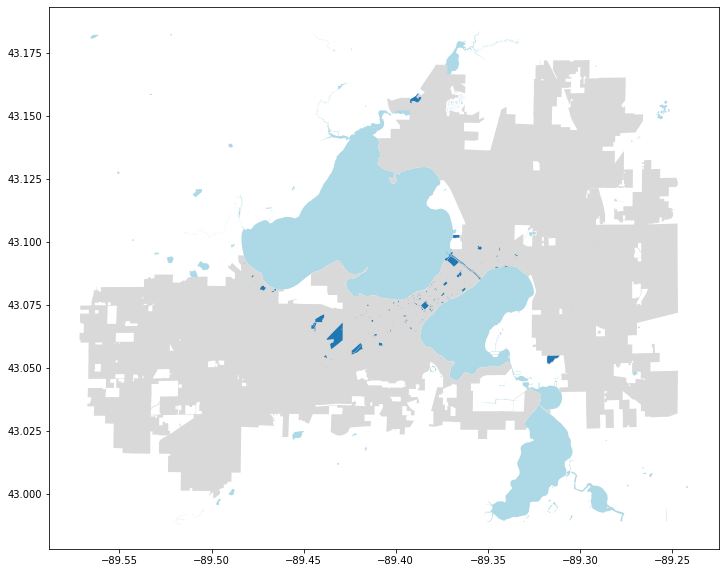

In [48]:
# route_num = 2
#
# def test_num(route_num):
#     route = trips[trips["route_short_name"] == route_num]
#     wkd = route[route["service_id"].str.contains("WKD")]
#     sat = route[route["service_id"].str.contains("SAT")]
#     sun = route[route["service_id"].str.contains("SUN")]
#     hol = route[route["service_id"].str.contains("HOL")]
#     mwk = route[route["service_id"].str.contains("MWK")]
#
#     return len(route) == sum([len(wkd), len(sat), len(sun), len(hol), len(mwk)])
#
# for route_num in set(trips["route_short_name"]):
#     if not test_num(route_num):
#         print(route_num)

In [68]:
master = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="MASTER")

# Unlinked Passenger Trips
upt    = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="UPT")

# Vehicle Revenue Miles
# - Actual vehicle miles include:
#   • Revenue service
#   • Deadhead
# - Actual vehicle miles exclude:
#   • Miles for charter service
#   • School bus service
#   • Operator training
#   • Vehicle maintenance testing
vrm    = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="VRM")

# Vehicle Revenue Hours
vrh    = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="VRH")

# Vehicles Operated in Annual Maximum Service
voms   = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="VOMS")

KeyboardInterrupt: 

In [6]:
# Mode: MB = MotorBus
#       DR = Demand Response Mode

# Type Of Service:
# TOS:  TX = Demand Response Mode with Taxi
#       DO = Directly Operated

master[(master["HQ State"] == "WI") & (master["Agency"].str.contains("Madison"))]

,5 digit NTD ID,4 digit NTD ID,Agency,Mode,TOS,Active,Reporter Type,HQ City,HQ State,UZA,...,Most Recent Report Year,FY End Month,FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Average Trip Length FY,Fares FY,Operating Expenses FY,Average Cost per Trip FY,Average Fares per Trip FY
1063,50005,5005,City of Madison,DR,DO,Active,Full Reporter,Madison,WI,92,...,2019.0,12.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,50005,5005,City of Madison,DR,PT,Active,Full Reporter,Madison,WI,92,...,2019.0,12.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,50005,5005,City of Madison,DR,TX,Active,Full Reporter,Madison,WI,92,...,2019.0,12.0,2019.0,660839.0,113301.0,5.8326,1502854.0,3155280.0,27.8487,13.2643
1066,50005,5005,City of Madison,MB,DO,Active,Full Reporter,Madison,WI,92,...,2019.0,12.0,2019.0,50762500.0,12856514.0,3.9484,12403091.0,49447862.0,3.8461,0.9647


In [79]:
# available since JAN02 till APR20, the rest haven't been reported
upt_madison = upt[upt["Agency"] == "City of Madison"]
upt_madison

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,JAN02,...,NOV19,DEC19,JAN20,FEB20,MAR20,APR20,MAY20,JUN20,JUL20,AUG20
1063,50005.0,5005,City of Madison,Active,Full Reporter,92.0,"Madison, WI",DR,DO,5629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,50005.0,5005,City of Madison,Active,Full Reporter,92.0,"Madison, WI",DR,PT,13867.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,50005.0,5005,City of Madison,Active,Full Reporter,92.0,"Madison, WI",DR,TX,NaN,...,9655.0,9305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,50005.0,5005,City of Madison,Active,Full Reporter,92.0,"Madison, WI",MB,DO,865836.0,...,1229313.0,977125.0,1055049.0,1278838.0,689277.0,110054.0,NaN,NaN,NaN,NaN


In [58]:
# Vehicle Revenue Miles
vrm_madison = vrm[vrm["Agency"] == "City of Madison"]

In [59]:
# Vehicle Revenue Hours
vrh_madison = vrh[vrh["Agency"] == "City of Madison"]

In [60]:
# Vehicles Operated in Annual Maximum Service
voms_madison = voms[voms["Agency"] == "City of Madison"]

In [100]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df = pd.DataFrame({
    "date"            : upt_madison.loc[1066, "JAN02":].index,
    "upt_madison"     : upt_madison.loc[1066, "JAN02":].values,
    "upt_wisc_state"  : upt[(upt["Modes"] == "MB") & (upt["UZA Name"].str.contains("WI"))].loc[:, "JAN02":].mean(),
    "upt_us"          : upt[upt["Modes"] == "MB"].loc[:, "JAN02":].mean(),
    "vrm_madison"     : vrm_madison.loc[1066, "JAN02":].values,
    "vrm_wisc_state"  : vrm[(vrm["Modes"] == "MB") & (vrm["UZA Name"].str.contains("WI"))].loc[:, "JAN02":].mean(),
    "vrm_us"          : vrm[vrm["Modes"] == "MB"].loc[:, "JAN02":].mean(),
    "vrh_madison"     : vrh_madison.loc[1066, "JAN02":].values,
    "vrh_wisc_state"  : vrh[(vrh["Modes"] == "MB") & (vrh["UZA Name"].str.contains("WI"))].loc[:, "JAN02":].mean(),
    "vrh_us"          : vrh[vrh["Modes"] == "MB"].loc[:, "JAN02":].mean(),
    "voms_madison"    : voms_madison.loc[1066, "JAN02":].values,
    "voms_wisc_state" : voms[(voms["Modes"] == "MB") & (voms["UZA Name"].str.contains("WI"))].loc[:, "JAN02":].mean(),
    "voms_us"         : voms[voms["Modes"] == "MB"].loc[:, "JAN02":].mean()
})

df.head()

df.to_csv(path_or_buf="../../../../data/FTA/madison_data.csv", index=False)

In [95]:
# upt_mb_others = upt[upt["Modes"] == "MB"].drop([1066]).loc[:, "JAN02":]
# upt_mb_others.mean()

upt[(upt["Modes"] == "MB") & (upt["UZA Name"].str.contains("WI"))].drop([1066]).loc[:, "JAN02":].mean()

JAN02   711195.29412
FEB02   674243.00000
MAR02   700548.88235
APR02   695600.82353
MAY02   696612.17647
            ...     
APR20   139239.85000
MAY20   150387.75000
JUN20   153063.05000
JUL20   179036.25000
AUG20   172190.45000
Length: 224, dtype: float64